In [1]:
#import packages
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop,SGD

Using TensorFlow backend.


In [0]:
#parameters
batch_size = 128
num_classes = 10
epochs = 100
learning_rate = 0.003

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

50000 train samples
10000 test samples


In [4]:
model = Sequential()
model.add(Dense(2048, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))



model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 128us/step - loss: 2.3087 - acc: 0.1175 - val_loss: 2.2279 - val_acc: 0.2010
Epoch 2/100
50000/50000 [==============================] - 5s 103us/step - loss: 2.2235 - acc: 0.1702 - val_loss: 2.1071 - val_acc: 0.2412
Epoch 3/100
50000/50000 [==============================] - 5s 103us/step - loss: 2.1289 - acc: 0.2064 - val_loss: 2.0175 - val_acc: 0.2659
Epoch 4/100
50000/50000 [==============================] - 5s 103us/step - loss: 2.0646 - acc: 0.2304 - val_loss: 1.9640 - val_acc: 0.2887
Epoch 5/100
50000/50000 [==============================] - 5s 103us/step - loss: 2.0100 - acc: 0.2558 - val_loss: 1.9200 - val_acc: 0.3065
Epoch 6/100
50000/50000 [==============================] - 5s 103us/step - loss: 1.9705 - acc: 0.2723 - val_loss: 1.8885 - val_acc: 0.3152
Epoch 7/100
50000/50000 [==============================] - 5s 103us/step - loss: 1.9406 - acc: 0.2875 - val_loss: 1.

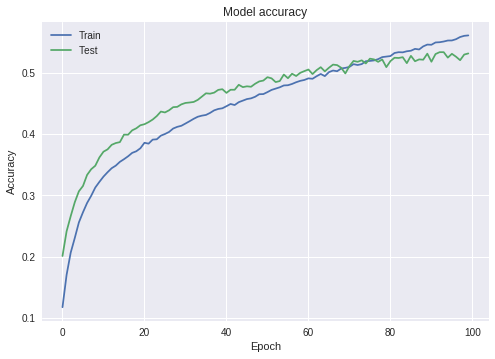

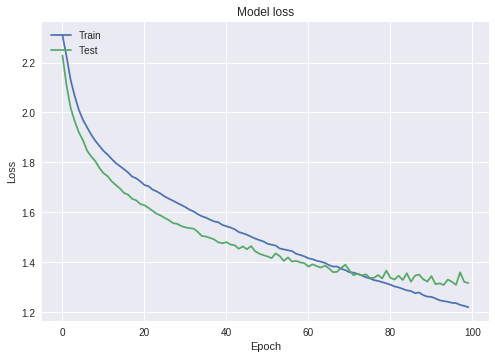

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=learning_rate),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()